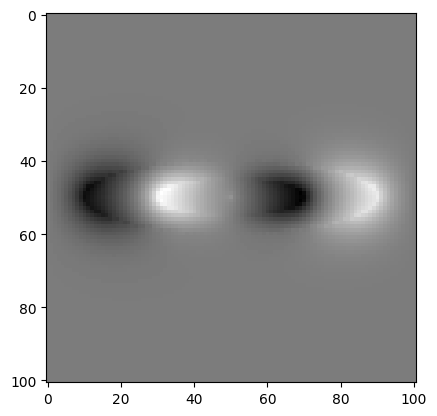

In [13]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show
from numpy import *

# Constants
L = 1.0 
M = 100         # Grid squares on a side
a = L/M 
rho0 = 1.0 
epsilon0 = 1.0 
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
#phi[0,:] = V
phiprime = empty([M+1,M+1],float)
rho = zeros([M+1, M+1], float) 
rho[50, 50] = rho0
# for i in range(0,50): 
#     for j in range(0,50): 
#         rho[2*i,2*j] = rho0
# for i in range(1,50): 
#     for j in range(1,50): 
#         rho[2*i,2*j] = -rho0

r = 20
thetalist = linspace(0,2*pi,100)
for theta in thetalist: 
    rho[50+round(r*.5*cos(theta)),50+round(r*2*sin(theta))] = rho0*sin(theta)
    rho[50+round(r/2*.5*cos(theta)),50+round(r/2*2*sin(theta))] = -rho0*sin(theta)

# Main loop
delta = 1.0
while delta>target:

    phiprime[0,:] = 0.0
    phiprime[M,:] = 0.0
    phiprime[:,0] = 0.0
    phiprime[:,M] = 0.0
    phiprime[1:M,1:M] = \
        (phi[0:M-1, 1:M] + phi[2:M+1, 1:M] \
         + phi[1:M,0:M-1] + phi[1:M,2:M+1])/4 \
        + rho[1:M,1:M]*a*a/(4*epsilon0)
    
    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

# Make a plot
imshow(phi)
gray()
show()


1 Plotted
2 Plotted
3 Plotted
4 Plotted
5 Plotted


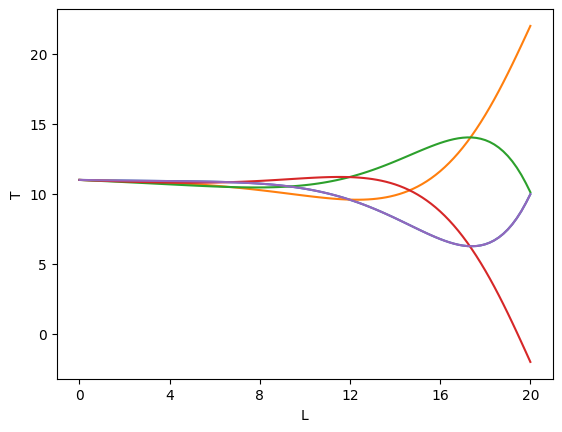

In [43]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show,xticks
from numpy import *

L = 20
D = .1
N = 100
a = L/N
h = 1e-1
A = 10
B = 12
tau = 365

epsilon = h/1000

def Tsurface(t): 
    return A + B*sin(2*pi*t/tau)

Tlo = Tsurface(0)
Tmid = 10
Thi = 11

t1 = 365*9
t2 = t1 + round(3*(365/12))
t3 = t1 + round(6*(365/12))
t4 = t1 + round(9*(365/12))
t5 = t1 + 365


tend = t5 + epsilon

T = empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

t = 0.0
c = h*D/(a*a)
while t < tend: 
    Tlo = Tsurface(t)
    T[N] = Tlo
    Tp[N] = Tlo
    for i in range(1,N): 
        Tp[i] = T[i] + c*(T[i+1] + T[i-1] - 2*T[i])
    T,Tp = Tp,T
    t += h
    if abs(t - t1) < epsilon: 
        plot(T,label="t = {}".format(t1))
        print("1 Plotted")
    if abs(t - t2) < epsilon: 
        plot(T,label="t = {}".format(t2))
        print("2 Plotted")
    if abs(t - t3) < epsilon: 
        plot(T,label="t = {}".format(t3))
        print("3 Plotted")
    if abs(t - t4) < epsilon: 
        plot(T,label="t = {}".format(t1))
        print("4 Plotted")
    if abs(t - t5) < epsilon: 
        plot(T,label="t = {}".format(t1))
        print("5 Plotted")
xlabel("L")
xticks([0,20,40,60,80,100],[0,4,8,12,16,20])
ylabel("T")
show()

In [ ]:
xlabel("x")
xticks([0,20,40,60,80,100],[0,4,8,12,16,20])
ylabel("T")
show()

1 Plotted
2 Plotted
3 Plotted
4 Plotted
5 Plotted


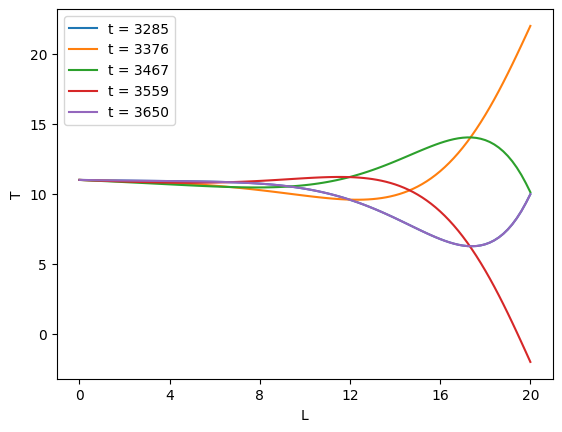

In [44]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show,xticks,legend
from numpy import *

L = 20
D = .1
N = 100
a = L/N
h = 1e-1
A = 10
B = 12
tau = 365

epsilon = h/1000

def Tsurface(t): 
    return A + B*sin(2*pi*t/tau)

Tlo = Tsurface(0)
Tmid = 10
Thi = 11

t1 = 365*9
t2 = t1 + round(3*(365/12))
t3 = t1 + round(6*(365/12))
t4 = t1 + round(9*(365/12))
t5 = t1 + 365


tend = t5 + epsilon

T = empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

t = 0.0
c = h*D/(a*a)
while t < tend: 
    Tlo = Tsurface(t)
    T[N] = Tlo
    Tp[N] = Tlo
    for i in range(1,N): 
        Tp[i] = T[i] + c*(T[i+1] + T[i-1] - 2*T[i])
    T,Tp = Tp,T
    t += h
    if abs(t - t1) < epsilon: 
        plot(T, label="t = {}".format(t1))
        print("1 Plotted")
    if abs(t - t2) < epsilon: 
        plot(T, label="t = {}".format(t2))
        print("2 Plotted")
    if abs(t - t3) < epsilon: 
        plot(T, label="t = {}".format(t3))
        print("3 Plotted")
    if abs(t - t4) < epsilon: 
        plot(T, label="t = {}".format(t4))
        print("4 Plotted")
    if abs(t - t5) < epsilon: 
        plot(T, label="t = {}".format(t5))
        print(" Plotted")
xlabel("L")
xticks([0,20,40,60,80,100],[0,4,8,12,16,20])
ylabel("T")
legend()
show()
